<a href="https://colab.research.google.com/github/gnitish18/Pattern-Audio-Slides/blob/master/SourceCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

DATA1 = np.matrix([[1.08,0.75,0.85,0.94,0.40,1.25,1.19,0.99,0.69,1.32],[0.08,-0.19,-0.11,0.01,-0.09,-0.21,0.07,0.04,-0.02,0.02]])
DATA2 = np.matrix([[0.01,-0.01,0.09,-0.05,-0.45,0.07,-0.33,-0.06,-0.33,-0.24],[0.85,1.05,0.93,1.41,1.45,1.20,0.88,1.08,1.10,1.01]])

data = np.matrix([[1.08,0.75,0.85,0.94,0.40,1.25,1.19,0.99,0.69,1.32,0.01,-0.01,0.09,-0.05,-0.45,0.07,-0.33,-0.06,-0.33,-0.24],[0.08,-0.19,-0.11,0.01,-0.09,-0.21,0.07,0.04,-0.02,0.02,0.85,1.05,0.93,1.41,1.45,1.20,0.88,1.08,1.10,1.01]])

t1 = np.full((10),1)
t2 = np.full((10),-1)
t = np.append(t1,t2)
t = t.reshape(-1, 20)

In [0]:
kernel_matrix = np.zeros((20,20))
"""
def K(x1,x2,t1,t2):
    output = np.exp(-np.matmul((x1-x2).T,(x1-x2))/2.0)
    return output*t1*t2

def krn(x1,x2):
    output = np.exp(-np.matmul((x1-x2).T,(x1-x2))/2.0)
    return output[0,0]
"""
def K(x1,x2,t1,t2):
    output = np.matmul(x1.T,x2)
    return output*t1*t2

def krn(x1,x2):
    output = np.matmul(x1.T,x2)
    return output[0,0]


In [0]:
for i in range(20):
    for j in range(20):
        kernel_matrix[i,j] = K(data[:,i],data[:,j],t[:, i],t[:, j])
kernel_matrix = np.concatenate((kernel_matrix, t), axis=0)

In [0]:
b = np.ones((21, 1))
b[20] = 0

x = np.linalg.pinv(kernel_matrix)

a = np.matmul(x, b)
# print(np.matmul(kernel_matrix,a))
# print(a)

In [36]:
m1 = []
M1 = []

for i in range (20):
  if a[i,0] > 0 and a[i,0] < 10:
    m1.append(i)

m2 = []
for i in range (20):
  if a[i,0] > 0:
    m2.append(i)

for i in range (len(m1)):
  M1.append(a[m1[i],0])

print(M1)

[0.09562022458741647, 0.03183160773936618, 0.051099034279988895, 0.07008859227850905, 0.1137410919628345, 0.11344794247018417, 0.0793787901088289, 0.027759788406808632, 0.13320545919712373, 0.05468562885461885, 0.05111918065892555, 0.038722062918134084, 0.04536034602750523, 0.11006349635030008, 0.0327510066424998, 0.10982071280499112, 0.05834828584929598, 0.10226337312517661, 0.09048763936647947]


In [37]:
w1=w2=0

for i in range(len(m2)):
  #print (data[0,m2[i]]) 
  w1 += a[m2[i],0]*t[0,m2[i]]*data[0,m2[i]] 
  w2 += a[m2[i],0]*t[0,m2[i]]*data[1,m2[i]]
w = np.array([[w1],[w2]])

print(w)

[[ 0.92839993]
 [-0.77654001]]


In [38]:
si = sj = 0
for i in range(len(m1)):
  for j in range(len(m2)):
    
    sj += a[m2[j],0]*t[0,m2[j]]*krn(data[:,j],data[:,i])
  si += (t[0,m1[i]]-sj)
  sj = 0
b = si/len(m1)

print(b)

0.04953690961144785


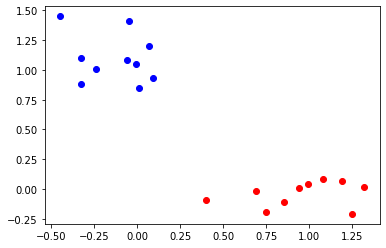

In [18]:
plt.plot(DATA1[0,:], DATA1[1,:], 'ro')
plt.plot(DATA2[0,:], DATA2[1,:], 'bo')
plt.show()

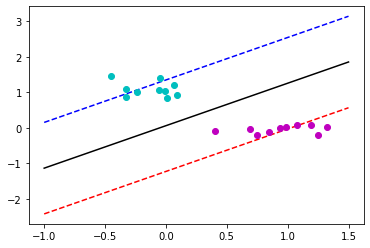

In [19]:
a = -w[0] / w[1]
xx = np.linspace(-1, 1.5)
yy = a * xx - (b) / w[1]
yy1 = a * xx - (1+b) / w[1]
yy2 = a * xx - (-1+b) / w[1]

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy1, 'b--')
plt.plot(xx, yy2, 'r--')
plt.plot(DATA1[0, :], DATA1[1, :], 'mo')
plt.plot(DATA2[0, :], DATA2[1, :], 'co')
plt.show()